In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Invitations=pd.read_csv(r'C:\Users\Andrea\Desktop\My_LinkedIn\Basic_Information_Files\Invitations.csv')
Invitations.tail()

,From,To,Sent At,Message,Direction
577,Aldo Javier Martinez Hutter,Marcela Huerfano,"12/5/19, 1:47 PM",NaN,INCOMING
578,Lina Marcela Escudero Góngora,Marcela Huerfano,"12/5/19, 1:43 PM",NaN,INCOMING
579,Edier Pacheco,Marcela Huerfano,"12/5/19, 11:42 AM",NaN,INCOMING
580,Andres Maldonado,Marcela Huerfano,"12/4/19, 5:51 PM",NaN,INCOMING
581,Absolute Latam,Marcela Huerfano,"12/4/19, 3:05 PM",NaN,INCOMING


In [3]:
print('The total number of invitations is: {}'.format(Invitations.shape[0]))

The total number of invitations is: 582


In [4]:
Invitations.dtypes

From         object
To           object
Sent At      object
Message      object
Direction    object
dtype: object

In [5]:
rule1 = r'(?P<Month>\d{1,2})[/](?P<Day>\d{1,2})[/](?P<Year>\d{2})'
rule2 = r'(?P<Date>\d{1,2}[/]\d{1,2}[/]\d{2})'
rule3 = r'(?P<Time>\d{1,2}[:]\d{1,2}[ ]\w{1,2})'
rule4 = r'(?P<Hour> \w{1,2})'
rule5 = r'(?P<AP> am|pm)'
extract_df = Invitations['Sent At'].str.lower().str.extract(rule1)
extract_df['Date']=Invitations['Sent At'].str.lower().str.extract(rule2)
extract_df['Time']=Invitations['Sent At'].str.lower().str.extract(rule3)
extract_df['Hour']=Invitations['Sent At'].str.lower().str.extract(rule4)
extract_df['AP']=Invitations['Sent At'].str.lower().str.extract(rule5)
extract_df.head()

,Month,Day,Year,Date,Time,Hour,AP
0,12,12,20,12/12/20,10:16 am,10,am
1,12,11,20,12/11/20,3:48 pm,3,pm
2,12,11,20,12/11/20,12:43 pm,12,pm
3,12,11,20,12/11/20,5:52 am,5,am
4,12,9,20,12/9/20,10:19 am,10,am


In [6]:
Invitations=pd.concat([Invitations, extract_df], axis=1)
Invitations.tail()

,From,To,Sent At,Message,Direction,Month,Day,Year,Date,Time,Hour,AP
577,Aldo Javier Martinez Hutter,Marcela Huerfano,"12/5/19, 1:47 PM",NaN,INCOMING,12,5,19,12/5/19,1:47 pm,1,pm
578,Lina Marcela Escudero Góngora,Marcela Huerfano,"12/5/19, 1:43 PM",NaN,INCOMING,12,5,19,12/5/19,1:43 pm,1,pm
579,Edier Pacheco,Marcela Huerfano,"12/5/19, 11:42 AM",NaN,INCOMING,12,5,19,12/5/19,11:42 am,11,am
580,Andres Maldonado,Marcela Huerfano,"12/4/19, 5:51 PM",NaN,INCOMING,12,4,19,12/4/19,5:51 pm,5,pm
581,Absolute Latam,Marcela Huerfano,"12/4/19, 3:05 PM",NaN,INCOMING,12,4,19,12/4/19,3:05 pm,3,pm


In [7]:
Int_list=['Month', 'Day', 'Year', 'Hour']
for variable in Int_list:
    Invitations[variable]=Invitations[variable].astype(int)
Invitations.dtypes

From         object
To           object
Sent At      object
Message      object
Direction    object
Month         int32
Day           int32
Year          int32
Date         object
Time         object
Hour          int32
AP           object
dtype: object

In [8]:
def hour_std(x):
    if x['AP']=='pm':
        x['Hour']+=12
    return x['Hour']

In [9]:
Invitations['Hour_st24']=Invitations.apply(hour_std, axis=1)

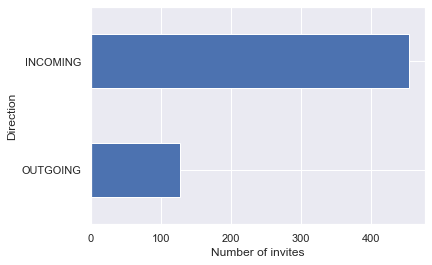

In [10]:
pivot=Invitations.pivot_table(index='Direction', values='From', aggfunc='count')
pivot=pivot.sort_values('From')
pivot.plot.barh(figsize=(6,4),  width= 0.5, legend=None)
plt.xlabel('Number of invites')
plt.show()

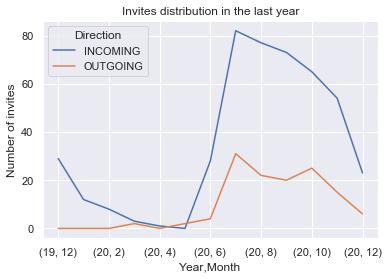

In [11]:
pivot=Invitations.pivot_table(index=['Year', 'Month'] , columns=['Direction'],values='From', aggfunc='count').fillna(0) #, columns='Month'
pivot.sort_values(['Year', 'Month'], ascending=True)
pivot.plot()
plt.title('Invites distribution in the last year')
plt.ylabel('Number of invites')
plt.show()

In [12]:
pivot = Invitations.pivot_table(index=['AP'], values=['From'], aggfunc='count', margins=False)
pivot1=pivot.reset_index()
pivot1['percentage']= np.round(100* (pivot1['From']/pivot1['From'].sum()),1)

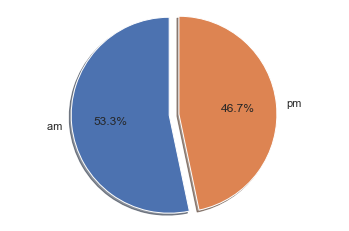

In [13]:
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(pivot1['percentage'], explode=explode, labels=pivot1['AP'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

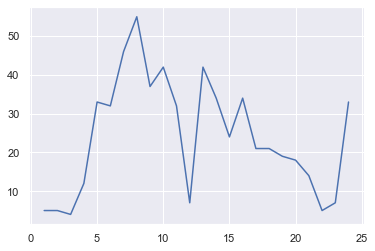

In [14]:
plt.plot(Invitations.pivot_table(index=['Hour_st24'], values='From', aggfunc='count'))
plt.show()

In [15]:
Messages=Invitations['Message'].dropna()
len(Messages)

12

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

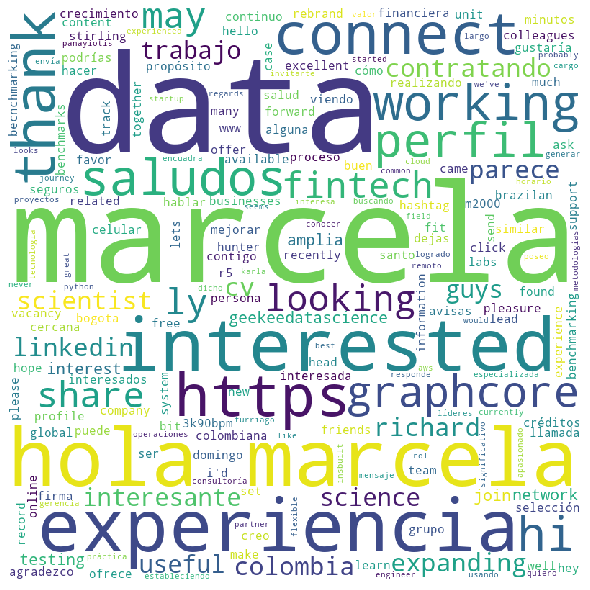

In [17]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

comment_words = '' 
stopwords = stopwords.words()
  
for val in Messages: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()